In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from skimage import io
import cv2
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
path = "lgg-mri-segmentation/kaggle_3m/"

In [3]:
mask_dir =glob(path+"*/*_mask*")

In [4]:
mask_dir

['lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_12_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_13_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_14_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_15_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_16_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_17_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_18_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_19_mask.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_

In [5]:
images_dir =[]
for img in mask_dir:
    images_dir.append(img.replace("_mask",""))

In [6]:
images_dir

['lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_12.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_13.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_14.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_15.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_16.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_17.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_18.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_19.tif',
 'lgg-mri-segmentation/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_1.tif',
 'lgg-mri-segmentation/kaggle_3m\

In [7]:
data_img = pd.DataFrame({"image_path":images_dir,"mask_path":mask_dir})

In [8]:
data_img.head()

,image_path,mask_path
0,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
1,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
2,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
3,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
4,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...


In [9]:
def pos_neg(file_name):
    mask =  np.max(cv2.imread(file_name))
    if mask>0:
        return 1
    else:
        return 0
    

In [10]:
data_img['tumor_presence']=data_img['mask_path'].apply(lambda x:pos_neg(x))

In [11]:
data_img

,image_path,mask_path,tumor_presence
0,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,0
1,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
2,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
3,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
4,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
5,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
6,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
7,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
8,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,1
9,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...,0


In [12]:
data_img['tumor_presence'].value_counts()

0    2556
1    1373
Name: tumor_presence, dtype: int64

In [13]:
def show_image(df):
    fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
    count = 0
    i = 0
    for mask in df["tumor_presence"]:
        if mask == 1:
          # Show images
            image = io.imread(df.image_path[i])
            ax[count][0].title.set_text("Brain MRI")
            ax[count][0].imshow(image)

          # Show masks
            mask = io.imread(df.mask_path[i])
            ax[count][1].title.set_text("Mask Brain MRI")
            ax[count][1].imshow(mask, cmap="gray")

          # Show MRI Brain with mask
            image[mask == 255] = (0, 255, 0)    # Here, we want to modify the color of pixel at the position of mask
            ax[count][2].title.set_text("MRI Brain with mask")
            ax[count][2].imshow(image)
            count += 1
        i += 1
        if count == 10:
            break
    fig.tight_layout()
    plt.show()


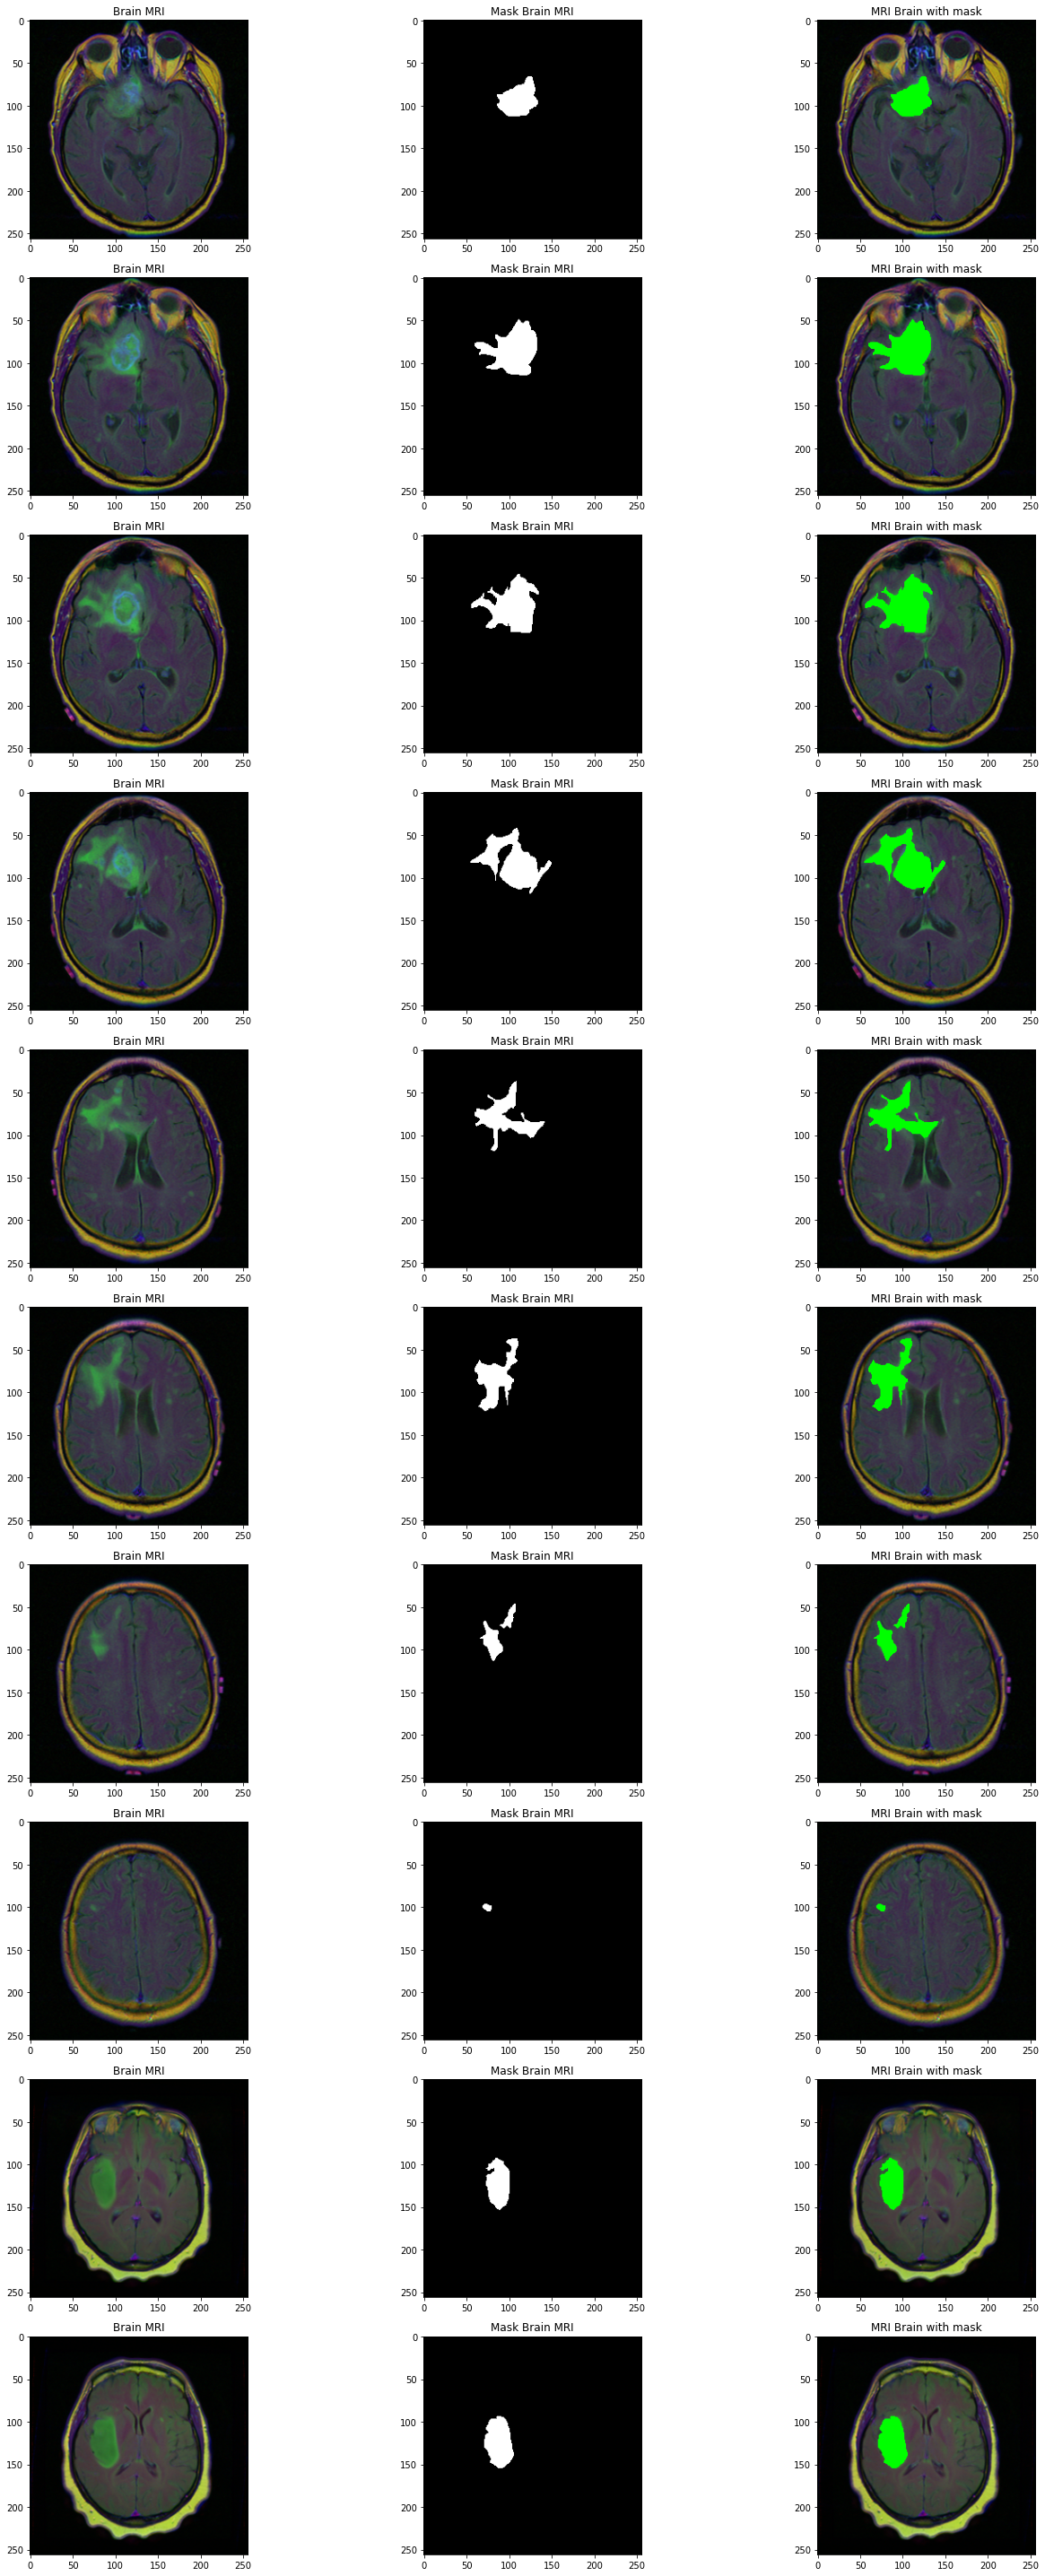

In [14]:
show_image(data_img)

In [15]:
##splitting the data into testing and traing datasets
X = data_img['image_path']
y=data_img['tumor_presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
len(X_train)

3143

In [17]:
len(X_test)

786

In [18]:
y_train.value_counts()

0    2046
1    1097
Name: tumor_presence, dtype: int64

In [19]:
y_test.value_counts()

0    510
1    276
Name: tumor_presence, dtype: int64

In [20]:
##convert images to vectors
def images_vectors(img_path,img_width,img_height):
    train_data = []
    for path in tqdm(img_path):
        img = cv2.imread(path)
        img = cv2.resize(img,(img_width,img_height))
        train_data.append(img)
    return np.array(train_data)

In [21]:
data_img['image_path'][:100]

0     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
1     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
2     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
3     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
4     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
5     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
6     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
7     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
8     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
9     lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
10    lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
11    lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
12    lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
13    lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
14    lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
15    lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
16    lgg-mri-segmentation/kaggle_3m\TCGA_CS_4941_19...
17    lgg-mri-segmentation/kaggle_3m\TCGA_CS_494

In [22]:
train_image = images_vectors(X_train[:3143],224,224)

100%|████████████████████████████████████████████████████████████████████████████| 3143/3143 [00:02<00:00, 1236.77it/s]


In [23]:
train_image

array([[[[3, 0, 3],
         [2, 5, 4],
         [2, 3, 3],
         ...,
         [3, 5, 3],
         [5, 3, 5],
         [9, 3, 4]],

        [[5, 0, 4],
         [4, 6, 4],
         [2, 5, 4],
         ...,
         [3, 2, 3],
         [5, 3, 3],
         [8, 3, 4]],

        [[4, 0, 2],
         [3, 5, 3],
         [2, 6, 4],
         ...,
         [8, 4, 3],
         [9, 7, 3],
         [9, 2, 4]],

        ...,

        [[2, 0, 2],
         [2, 3, 3],
         [3, 5, 2],
         ...,
         [2, 3, 3],
         [2, 4, 2],
         [2, 3, 3]],

        [[2, 0, 1],
         [1, 5, 2],
         [2, 6, 2],
         ...,
         [2, 3, 2],
         [2, 3, 2],
         [2, 4, 2]],

        [[2, 0, 2],
         [2, 3, 2],
         [3, 4, 1],
         ...,
         [2, 4, 2],
         [2, 4, 2],
         [2, 3, 2]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 1],
         [0, 0, 2],
         [0, 0, 0]],

        [[0, 0, 1],
         [1,

In [24]:
test_image = images_vectors(X_test[:786],224,224)

100%|██████████████████████████████████████████████████████████████████████████████| 786/786 [00:00<00:00, 1229.45it/s]


In [25]:
###defining our model
model =  keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,3,activation='relu',))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                5972032   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [27]:
###loss and optimizer
optim = keras.optimizers.Adam(lr=0.001)
metrics=['accuracy']

In [28]:
model.compile(optimizer=optim,loss='binary_crossentropy',metrics=metrics)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
###training
batch_size =64
epochs =10
model.fit(train_image,y_train.values,epochs=epochs,batch_size=batch_size,verbose=2)

Epoch 1/10
3143/3143 - 54s - loss: 15.6187 - acc: 0.6866
Epoch 2/10
3143/3143 - 54s - loss: 0.3760 - acc: 0.8355
Epoch 3/10
3143/3143 - 54s - loss: 0.2376 - acc: 0.9103
Epoch 4/10
3143/3143 - 55s - loss: 0.1494 - acc: 0.9459
Epoch 5/10
3143/3143 - 53s - loss: 0.0869 - acc: 0.9771
Epoch 6/10
3143/3143 - 54s - loss: 0.0727 - acc: 0.9812
Epoch 7/10
3143/3143 - 53s - loss: 0.0343 - acc: 0.9930
Epoch 8/10
3143/3143 - 52s - loss: 0.0216 - acc: 0.9965
Epoch 9/10
3143/3143 - 52s - loss: 0.0121 - acc: 0.9994
Epoch 10/10
3143/3143 - 52s - loss: 0.0190 - acc: 0.9975


In [32]:
###evaluate
model.evaluate(test_image,y_test.values,batch_size=batch_size,verbose=2)

786/786 - 4s - loss: 0.3651 - acc: 0.9071


[0.36509670040382985, 0.9071247]

In [38]:
train_image[1].shape

(224, 224, 3)

In [47]:
im=np.expand_dims(train_image[1],axis=0)

In [48]:
im.shape

(1, 224, 224, 3)

In [53]:
m=model.predict_classes(test_image)

In [54]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test.values,m)

0.9071246819338422